<a href="https://colab.research.google.com/github/boriphat12/GDP-Analysis/blob/main/GDP_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDP Prediction**
This project aims to predict the Gross Domestic Product Growth rate (GDP growth) of a country by analyzing the data of various countries.
---
The dataset has been taken from kaggle. It has a dataest of 181 countries\
https://www.kaggle.com/datasets/asadullahcreative/global-gdp-explorer-2024-world-bank-un-data


# **Data Dictionary**
|Feature Name|Description|
|--|--|
|Country	Official|country name|
|GDP (nominal, 2023)|Total nominal GDP in USD|
|GDP (abbrev.)|Simplified GDP format (e.g., “$25.46 Trillion”)|
|GDP Growth|Annual GDP growth rate (%)|
|Population 2023|Estimated population for 2023|
|GDP per capita|Average income per person (USD)|
|Share of World GDP|Percentage contribution to global GDP|

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
df = pd.read_csv('/content/GlobalGDP.csv')
df.head()

,Unnamed: 0,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
0,0,United States,"$27,720,700,000,000",27.721 trillion,2.89%,343477335,"$80,706",26.11%
1,1,China,"$17,794,800,000,000",17.795 trillion,5.25%,1422584933,"$12,509",16.76%
2,2,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,84548231,"$53,528",4.26%
3,3,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,124370947,"$33,806",3.96%
4,4,India,"$3,567,550,000,000",3.568 trillion,8.15%,1438069596,"$2,481",3.36%


# **Data Preprocessing part 1**

In [250]:
df.shape

(181, 8)

In [251]:
df.dtypes

,0
Unnamed: 0,int64
Country,object
"GDP (nominal, 2023)",object
GDP (abbrev.),object
GDP Growth,object
Population 2023,int64
GDP per capita,object
Share of World GDP,object


In [252]:
#Dropping not needed column
df.drop(columns=['GDP (nominal, 2023)', 'Unnamed: 0'], axis=1, inplace=True)

In [253]:
# change GDP values to numerical
def GDP_format(gdp):
  data = gdp.split(' ')
  if data[1] == 'trillion':
    return float(data[0]) * pow(10, 12);
  elif data[1] == 'billion':
    return float(data[0]) * pow(10, 9)
  elif data[1] == 'million':
    return float(data[0]) * pow(10, 6)

df['GDP (abbrev.)'] = df['GDP (abbrev.)'].apply(GDP_format);

In [254]:
df['GDP (abbrev.)'].sort_values(ascending=True)

,GDP (abbrev.)
180,6.228000e+07
179,2.593000e+08
178,2.792090e+08
177,2.818490e+08
176,4.600000e+08
...,...
4,3.568000e+12
3,4.204000e+12
2,4.526000e+12
1,1.779500e+13


In [255]:
# change values of GDP growth and share of world GDP
def remove_percent(g):
  return float(g.replace('−', '-')[: -1]) / 100
df['GDP Growth'] = df['GDP Growth'].apply(remove_percent)
df['Share of World GDP'] = df['Share of World GDP'].apply(remove_percent)

In [256]:
# change values of GDP per capita to numerical
def gdp_capita(gdp):
  return float(gdp.replace('$', '').replace(',', ''))
df['GDP per capita'] = df['GDP per capita'].apply(gdp_capita)

In [169]:
# install pycountry to convert country to continent
!pip install pycountry-convert

import pycountry_convert as pc

In [257]:
def continent(row):
  try:
    #convert name to country code
    country_code = pc.country_name_to_country_alpha2(row['Country'], cn_name_format='default')
    #convert country code to continent code
    cont_code = pc.country_alpha2_to_continent_code(country_code)
    return cont_code
  except KeyError:
    return 'Unknown'

df['Country'] = df['Country'].replace('Czech Republic (Czechia)', 'Czech Republic')
df['Country'] = df['Country'].replace('DR Congo', 'Democratic Republic of the Congo')
df['Country'] = df['Country'].replace('State of Palestine', 'Palestine')


df['Continent'] = df.apply(continent, axis=1)

continent_names = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Oceania',
    'EU': 'Europe',
    'AF': 'Africa',
    'AN': 'Antarctica',
    'Unknown': 'Unknown'
}

df['Continent'] = df['Continent'].map(continent_names)

In [258]:
df = df[df['Continent'] != 'Unknown']
display(df.shape)

(177, 7)

In [259]:
df.describe()

,GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
count,1.770000e+02,177.000000,1.770000e+02,177.000000,1.770000e+02
mean,5.907818e+11,0.034045,4.455953e+07,17899.468927,5.562896e-03
std,2.543636e+12,0.067428,1.571668e+08,23496.885410,2.395753e-02
min,6.228000e+07,-0.201100,9.816000e+03,193.000000,5.900000e-07
25%,1.576400e+10,0.012500,2.697845e+06,2478.000000,1.500000e-04
50%,4.927900e+10,0.029600,9.304337e+06,7182.000000,4.600000e-04
75%,3.379120e+11,0.050400,3.378791e+07,23772.000000,3.200000e-03
max,2.772100e+13,0.750600,1.438070e+09,128936.000000,2.611000e-01


In [260]:
df.head()

,Country,GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP,Continent
0,United States,2.772100e+13,0.0289,343477335,80706.0,0.2611,North America
1,China,1.779500e+13,0.0525,1422584933,12509.0,0.1676,Asia
2,Germany,4.526000e+12,-0.0027,84548231,53528.0,0.0426,Europe
3,Japan,4.204000e+12,0.0168,124370947,33806.0,0.0396,Asia
4,India,3.568000e+12,0.0815,1438069596,2481.0,0.0336,Asia


# **Exploratory Data Analysis**
In this section, I will analysis the relationship between independent variables and target variable(GDP Growth). This will help me to understand the data better

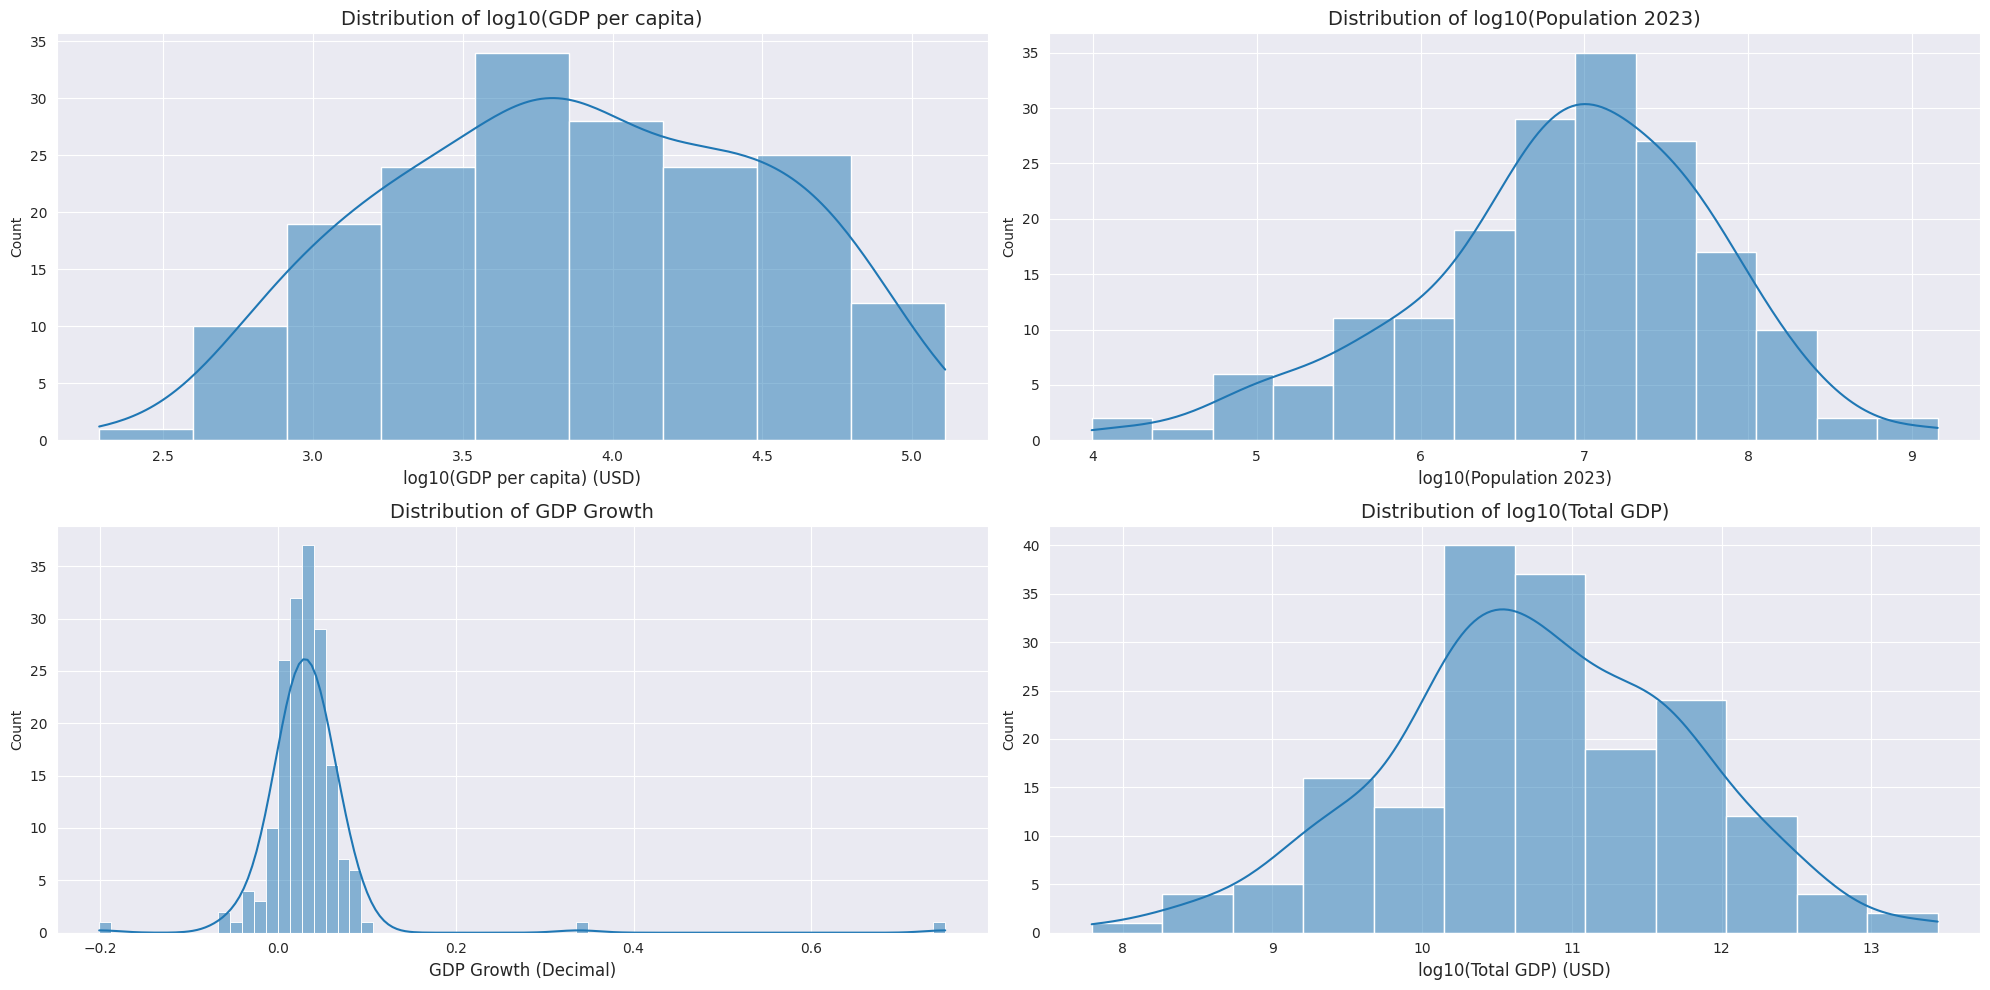

In [261]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

sns.histplot(data=df, x=np.log10(df['GDP per capita']), ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Distribution of log10(GDP per capita)', fontsize=14)
ax[0, 0].set_xlabel('log10(GDP per capita) (USD)', fontsize=12)

sns.histplot(data=df, x=np.log10(df['Population 2023']), ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of log10(Population 2023)', fontsize=14)
ax[0, 1].set_xlabel('log10(Population 2023)', fontsize=12)

sns.histplot(data=df, x='GDP Growth', ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of GDP Growth', fontsize=14)
ax[1, 0].set_xlabel('GDP Growth (Decimal)', fontsize=12)

sns.histplot(data=df, x=np.log10(df['GDP (abbrev.)']), ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Distribution of log10(Total GDP)', fontsize=14)
ax[1, 1].set_xlabel('log10(Total GDP) (USD)', fontsize=12)

plt.tight_layout()
plt.savefig('gdp_univariate_histograms.png')


From the above graphs, it shows that most countries have a GDP per capita between \$3,000 and \$30,000, a total GDP of roughly \$30 billion, and a population of about 10 million. The GDP growth rate for the bulk of countries is centered around 2\% for the observed period.


**GDP and Continent**

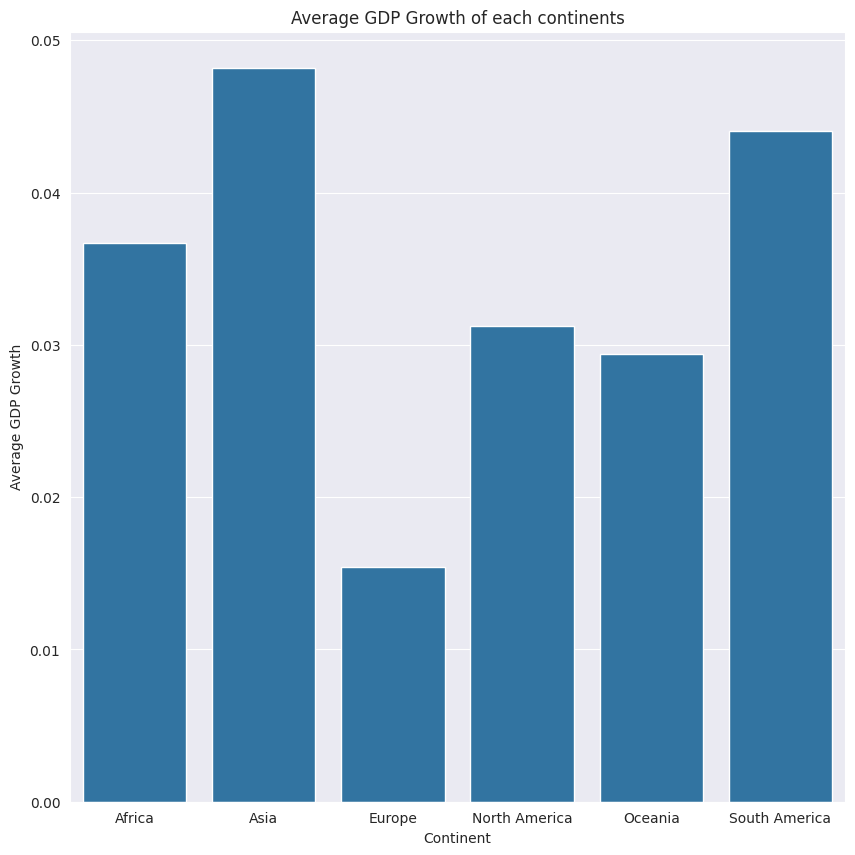

In [262]:
contdf = df.groupby('Continent')['GDP Growth'].mean().reset_index()
contdf.sort_values(by='GDP Growth', ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(y='GDP Growth', x='Continent', data=contdf)
plt.title('Average GDP Growth of each continents')
plt.ylabel('Average GDP Growth')
plt.xlabel('Continent')
plt.show()


The continent that has most GDP Growth is Asia folloewd by South America, Africa, North America, Oceania and Europe

# **Data Preprocessing part 2**

In [263]:
df['log_GDP'] = np.log10(df['GDP (abbrev.)'])
df['log_Population'] = np.log10(df['Population 2023'])
df['log_GDP_per_capita'] = np.log10(df['GDP per capita'])
df.head()

,Country,GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP,Continent,log_GDP,log_Population,log_GDP_per_capita
0,United States,2.772100e+13,0.0289,343477335,80706.0,0.2611,North America,13.442809,8.535898,4.906906
1,China,1.779500e+13,0.0525,1422584933,12509.0,0.1676,Asia,13.250298,9.153078,4.097223
2,Germany,4.526000e+12,-0.0027,84548231,53528.0,0.0426,Europe,12.655715,7.927105,4.728581
3,Japan,4.204000e+12,0.0168,124370947,33806.0,0.0396,Asia,12.623663,8.094719,4.528994
4,India,3.568000e+12,0.0815,1438069596,2481.0,0.0336,Asia,12.552425,9.157780,3.394627


In [264]:
df = pd.get_dummies(df, columns=['Continent'], prefix='Cont', drop_first=True)

# **Correlation heatmap**

<Axes: >

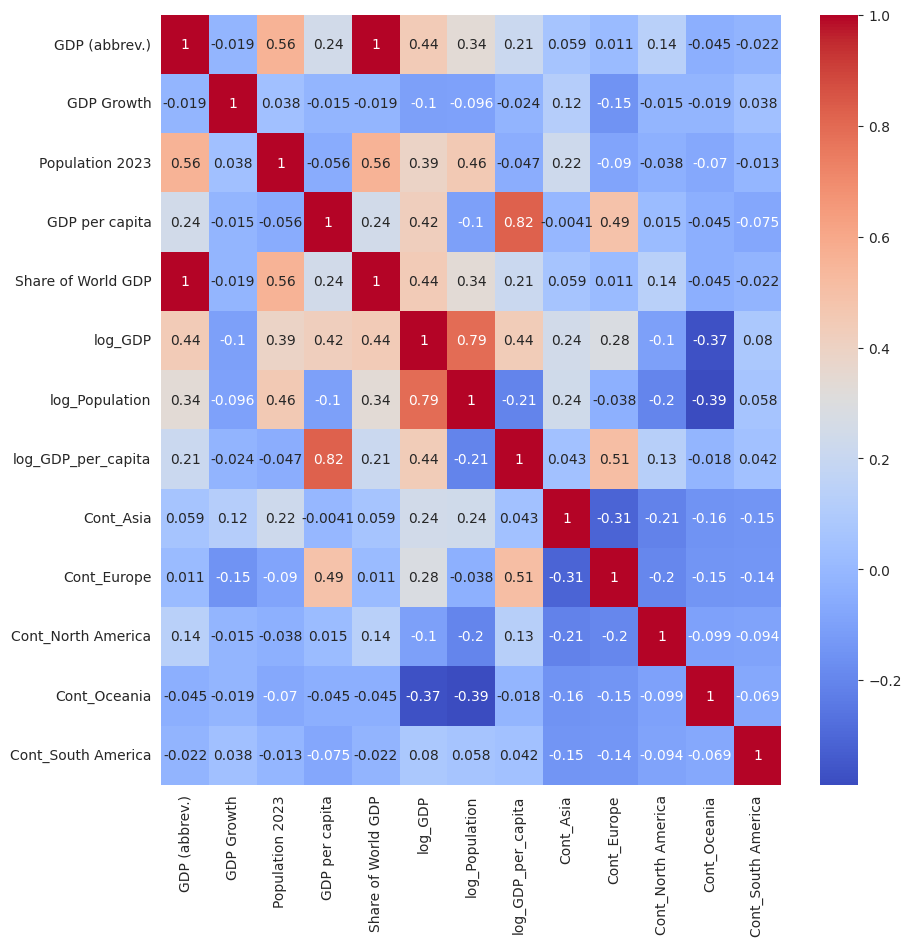

In [265]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

the relationship between share of world GDP and GDP is 1 because A country's share of world GDP is calculated directly from its total GDP, so I should not use share of world GDP for training a prediction model.

# **Outlier removal**

In [266]:
def remove_outlier_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

initial_rows = len(df)
df = remove_outlier_iqr(df, 'log_GDP')
df = remove_outlier_iqr(df, 'log_Population')
df = remove_outlier_iqr(df, 'log_GDP_per_capita')
df = remove_outlier_iqr(df, 'GDP Growth')
final_rows = len(df)
print(f'Removed {initial_rows - final_rows} rows')
print('final rows:', final_rows)


Removed 10 rows
final rows: 167


# **Train test split**

In [288]:
from sklearn.model_selection import train_test_split
ohe_cols = [col for col in df.columns if col.startswith('Cont_')]
selected_cols = ['log_GDP_per_capita', 'log_GDP'] + ohe_cols
X = df.loc[:, selected_cols]
y = df.loc[:, ['GDP Growth']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# **Model**

In [289]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

params = {
    'n_estimators': [100, 200],
    'max_depth': [2,4,6],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [50]
    }

grid = GridSearchCV(rfr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

grid.fit(X_train, y_train.values.ravel())

print(grid.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
157 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 50}


In [290]:
from sklearn.tree import DecisionTreeRegressor
rfr = RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=50)
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.4495715140986797

In [291]:
y_pred = rfr.predict(X_test)

In [292]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.2622985352467705
Mean Squared Error:  0.0002974283718648734
Mean Absolute Error:  0.013487269067411121
Root Mean Squared Error:  0.017246111789759263


# **Feature Importance**

In [294]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,log_GDP_per_capita,0.453580
1,log_GDP,0.347392
3,Cont_Europe,0.093463
4,Cont_North America,0.034620
2,Cont_Asia,0.026846
5,Cont_Oceania,0.022329
6,Cont_South America,0.021769


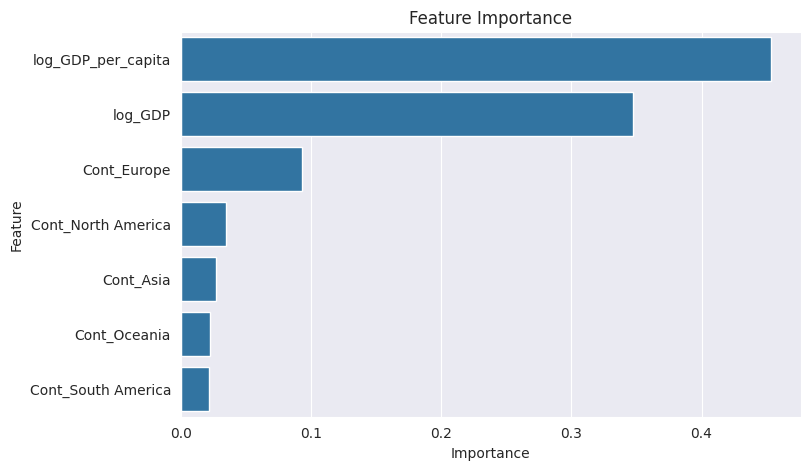

In [295]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()